#### Amazinum. Task 12. PCA. Moisei

#### Load dataset

<IPython.core.display.Javascript object>


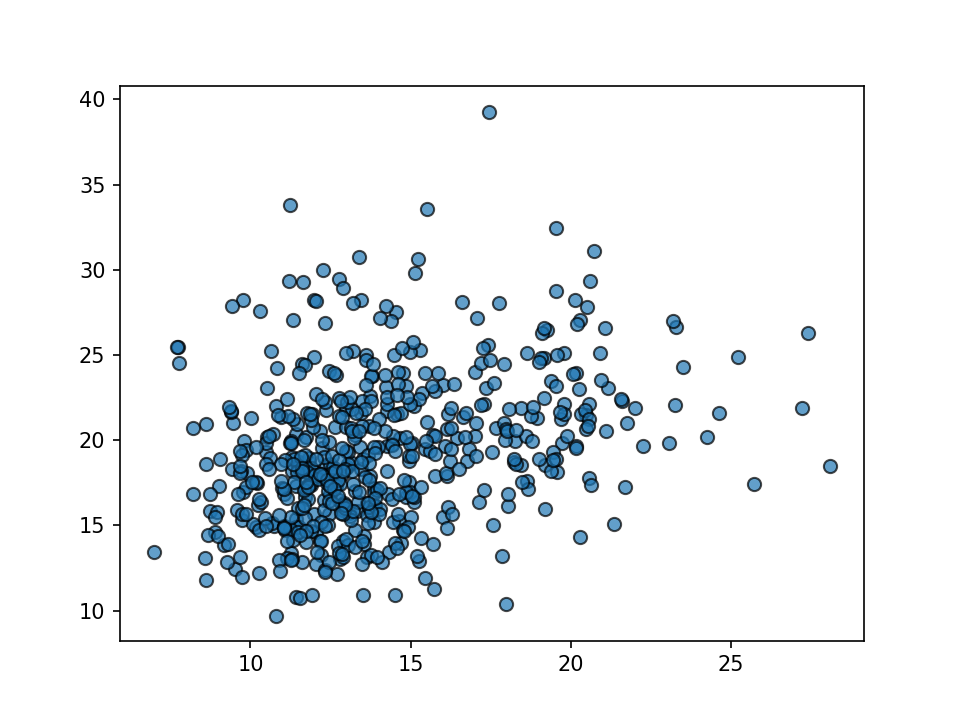

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib notebook

import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# import load_breast_cancer and get the X_cancer, y_cancer
cancer = load_breast_cancer()
(X_cancer, y_cancer)= load_breast_cancer(return_X_y = True) 

plt.scatter(X_cancer[:,0], X_cancer[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)

<IPython.core.display.Javascript object>


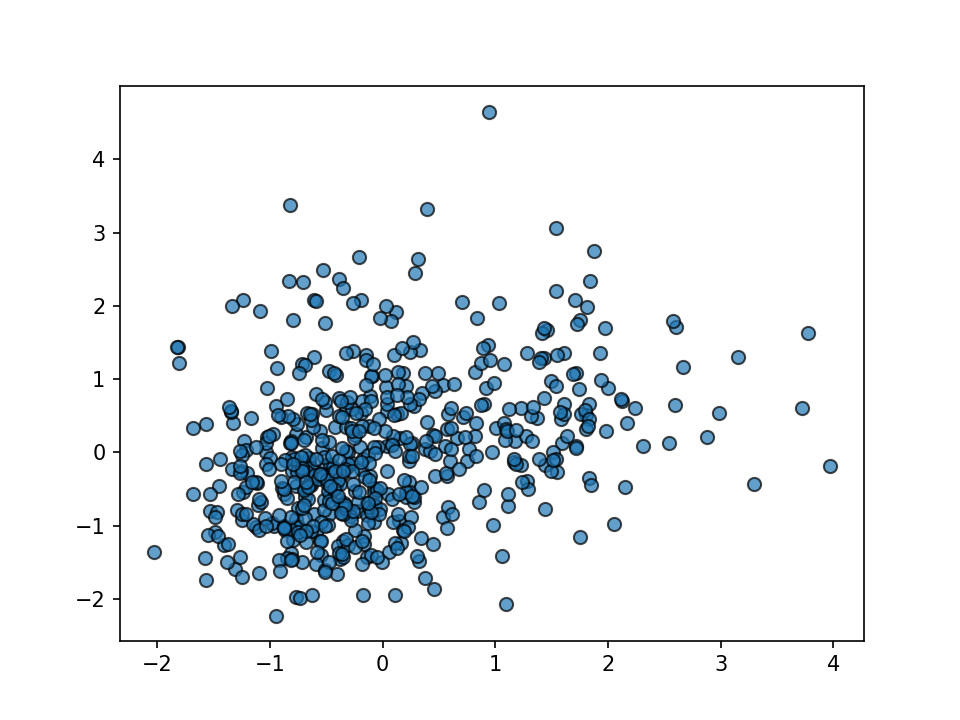

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_origin= np.c_[X_cancer, y_cancer]
X=  scaler.fit_transform(X_origin)
m,n = X.shape
plt.figure()
plt.scatter(X[:,0], X[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)

#### Covariance Matrix

In [10]:
cov_matrix= np.cov(X.T, ddof=0) # ddof=0 will return the simple average 
print('numpy cov_matrix:\n', cov_matrix)
sigma = 1/(m) * X.T @ X
print('\ncomputed explicitly cov_matrix:\n', sigma)

numpy cov_matrix:
 [[ 1.00000000e+00  3.23781891e-01  9.97855281e-01  9.87357170e-01
   1.70581187e-01  5.06123578e-01  6.76763550e-01  8.22528522e-01
   1.47741242e-01 -3.11630826e-01  6.79090388e-01 -9.73174431e-02
   6.74171616e-01  7.35863663e-01 -2.22600125e-01  2.05999980e-01
   1.94203623e-01  3.76168956e-01 -1.04320881e-01 -4.26412691e-02
   9.69538973e-01  2.97007644e-01  9.65136514e-01  9.41082460e-01
   1.19616140e-01  4.13462823e-01  5.26911462e-01  7.44214198e-01
   1.63953335e-01  7.06588569e-03 -7.30028511e-01]
 [ 3.23781891e-01  1.00000000e+00  3.29533059e-01  3.21085696e-01
  -2.33885160e-02  2.36702222e-01  3.02417828e-01  2.93464051e-01
   7.14009805e-02 -7.64371834e-02  2.75868676e-01  3.86357623e-01
   2.81673115e-01  2.59844987e-01  6.61377735e-03  1.91974611e-01
   1.43293077e-01  1.63851025e-01  9.12716776e-03  5.44575196e-02
   3.52572947e-01  9.12044589e-01  3.58039575e-01  3.43545947e-01
   7.75033588e-02  2.77829592e-01  3.01025224e-01  2.95315843e-01
   1.0

In [12]:
sigma.shape

(31, 31)

Deliberately created cell to avoid skipping next cell execution

In [13]:
w, v = np.linalg.eig(cov_matrix) # w - eigenvalues, v - normalized eigenvectors,  
# such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i]
v

array([[-2.16399142e-01, -2.26544730e-01,  2.52701218e-03,
        -5.04480406e-02,  4.17514426e-02, -1.92387685e-02,
         1.13375192e-01,  2.64950105e-02, -2.23138417e-01,
         9.94528633e-02,  3.53081074e-02, -6.58312316e-02,
        -4.69301068e-02,  3.17640848e-02, -4.91407421e-02,
        -6.02915616e-02, -1.49679942e-01,  1.97432246e-01,
        -2.37827952e-01,  1.32340264e-01,  7.02475498e-01,
         2.06961991e-01, -2.12824112e-01, -1.41750577e-01,
        -1.30571296e-01,  2.42793473e-02, -1.84560235e-01,
         9.46712145e-02,  7.12837755e-02,  7.71942331e-02,
        -1.57824556e-02],
       [-1.03599359e-01, -5.82619564e-02,  5.47507650e-02,
         5.99536672e-01, -2.04475783e-02,  3.00177272e-02,
        -2.75020212e-02, -1.00374070e-01,  1.12613548e-01,
         2.53797730e-01,  3.12407489e-01,  1.64216449e-01,
        -2.36735325e-01, -1.58721096e-01, -4.39136893e-03,
        -1.07723525e-01, -1.56678466e-01, -3.93985464e-02,
         3.96331930e-02,  6.17

<IPython.core.display.Javascript object>


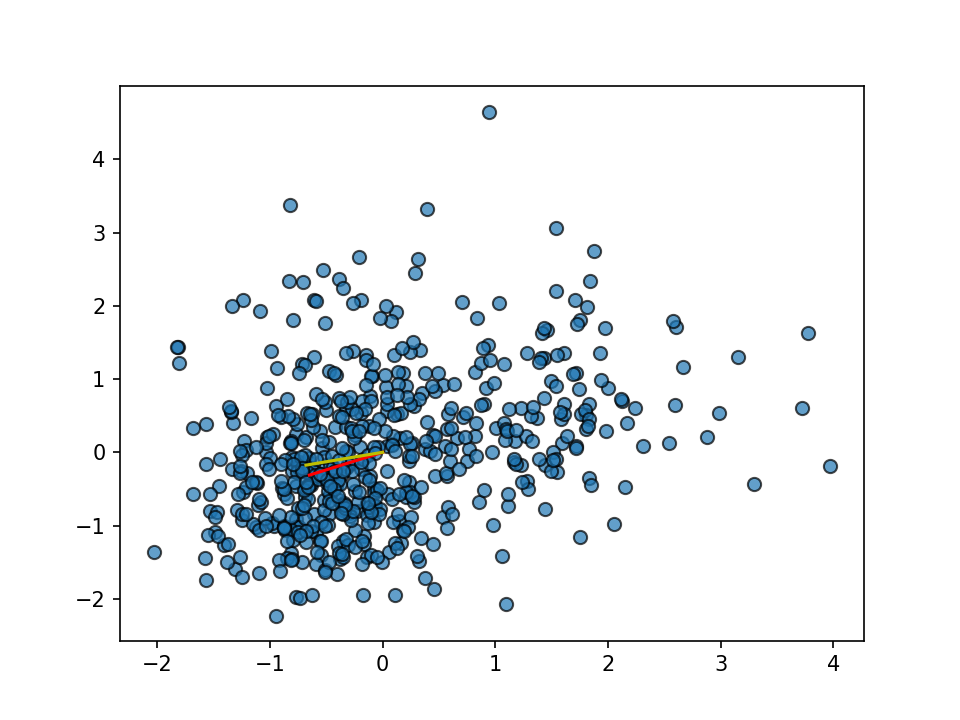

In [66]:
plt.figure()
plt.scatter(X[:,0], X[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)

v0= v[:, 0] # Note: every columns is vector 
v1= v[:, 1]

plt.plot ([0, v0[0]*3],[0, v0[1]*3], '-', c= 'r')
plt.plot ([0, v1[0]*3],[0, v1[1]*3], '-', c= 'y')

Transfrom data

In [46]:
k = 2
U_reduce = v[:, :k] 
Z= X@ U_reduce
print (Z.shape)
Z[:10]

(569, 2)


array([[-9.22577011,  2.11619563],
       [-2.6558016 , -3.78477586],
       [-5.89249212, -1.00557896],
       [-7.13540075, 10.31871637],
       [-4.12942271, -1.90557914],
       [-2.57287212,  3.8850186 ],
       [-2.50779632, -2.72769596],
       [-2.35324154,  2.28487166],
       [-3.36168041,  3.34448657],
       [-6.41931111,  7.74695455]])

Decompress data

In [47]:
X_approximate = Z @ U_reduce.T

X_approximate.shape

(569, 31)

<IPython.core.display.Javascript object>


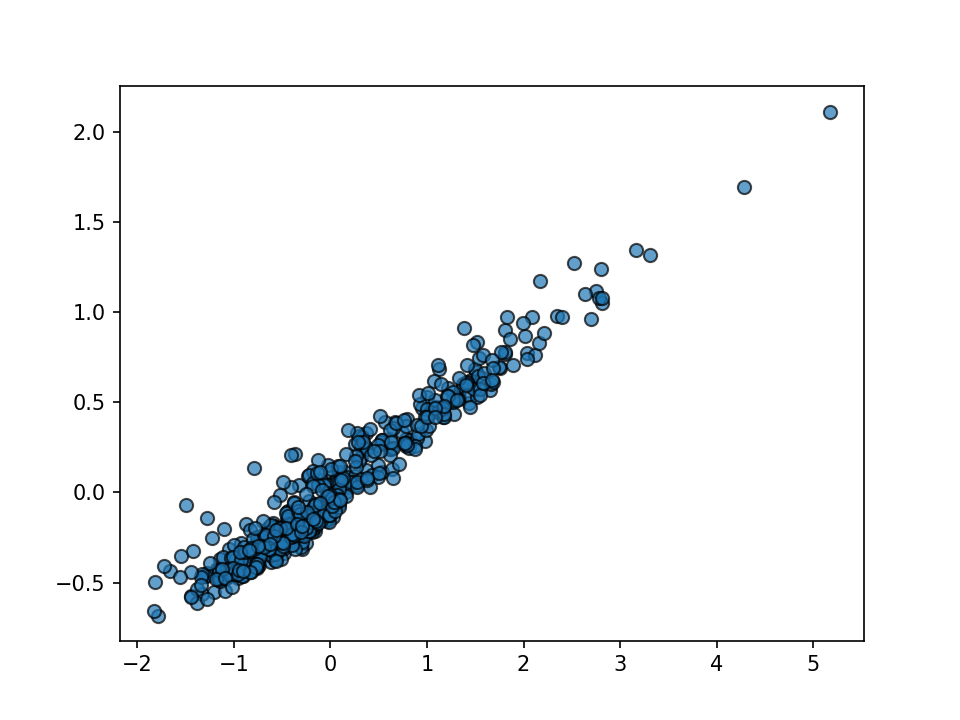

In [48]:
plt.figure()
plt.scatter(X_approximate[:,0], X_approximate[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)

#### Sklearn

[[ 0.21639914  0.10359936  0.2245478   0.21796464  0.13764549  0.23150388
   0.25122179  0.2552664   0.1330126   0.05797189  0.20090409  0.01547414
   0.20563036  0.19798194  0.01123624  0.1619218   0.14578435  0.1762679
   0.03832541  0.09508414  0.22558983  0.10501867  0.23364163  0.22196962
   0.12530106  0.20447639  0.22307483  0.24628844  0.12066328  0.12672101
  -0.21691695]
 [-0.22654473 -0.05826196 -0.20762951 -0.22322434  0.18876038  0.15847307
   0.06786768 -0.02722028  0.19321967  0.36761956 -0.09715581  0.09118826
  -0.08069084 -0.14355563  0.20531469  0.23886735  0.203226    0.13704859
   0.1860032   0.28433173 -0.21289639 -0.04513536 -0.19259202 -0.21188718
   0.17247591  0.14766283  0.10308807 -0.00243309  0.14206245  0.27644912
   0.07760994]]


<IPython.core.display.Javascript object>


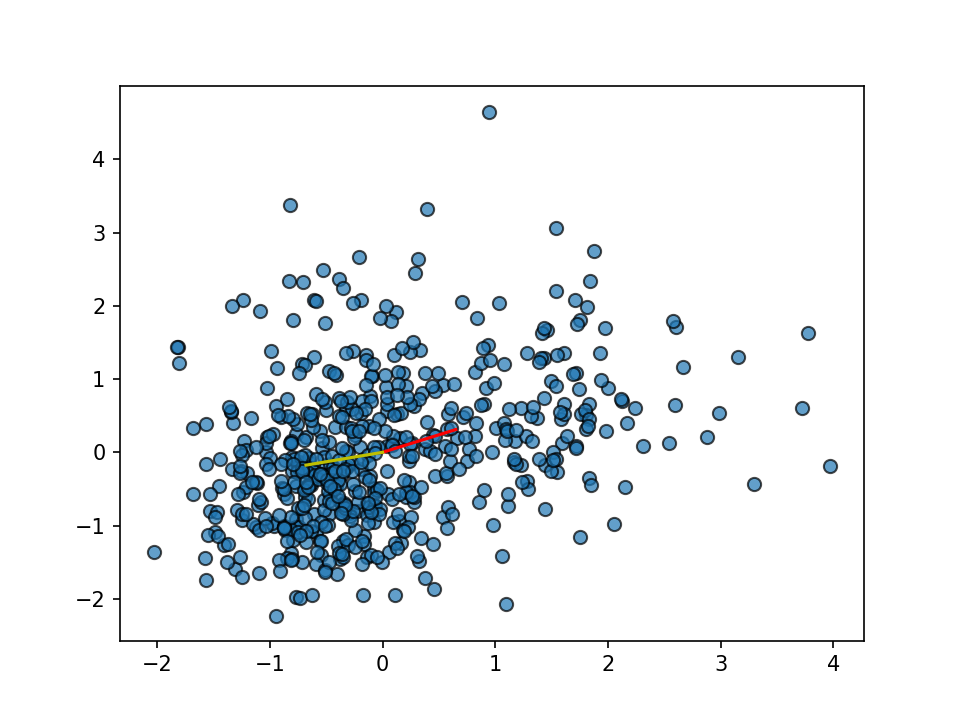

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print (pca.components_) # components_ : array, shape (n_components, n_features)

plt.figure()
plt.scatter(X[:,0], X[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)

v0= pca.components_[0] # Note: every row is vector 
v1= pca.components_[1]

plt.plot ([0, v0[0]*3],[0, v0[1]*3], '-', c= 'r')
plt.plot ([0, v1[0]*3],[0, v1[1]*3], '-', c= 'y')

In [60]:
v

array([[-2.16399142e-01, -2.26544730e-01,  2.52701218e-03,
        -5.04480406e-02,  4.17514426e-02, -1.92387685e-02,
         1.13375192e-01,  2.64950105e-02, -2.23138417e-01,
         9.94528633e-02,  3.53081074e-02, -6.58312316e-02,
        -4.69301068e-02,  3.17640848e-02, -4.91407421e-02,
        -6.02915616e-02, -1.49679942e-01,  1.97432246e-01,
        -2.37827952e-01,  1.32340264e-01,  7.02475498e-01,
         2.06961991e-01, -2.12824112e-01, -1.41750577e-01,
        -1.30571296e-01,  2.42793473e-02, -1.84560235e-01,
         9.46712145e-02,  7.12837755e-02,  7.71942331e-02,
        -1.57824556e-02],
       [-1.03599359e-01, -5.82619564e-02,  5.47507650e-02,
         5.99536672e-01, -2.04475783e-02,  3.00177272e-02,
        -2.75020212e-02, -1.00374070e-01,  1.12613548e-01,
         2.53797730e-01,  3.12407489e-01,  1.64216449e-01,
        -2.36735325e-01, -1.58721096e-01, -4.39136893e-03,
        -1.07723525e-01, -1.56678466e-01, -3.93985464e-02,
         3.96331930e-02,  6.17

Transform data

In [61]:
Z= pca.transform(X)
print (Z.shape)
Z[:10]

(569, 2)


array([[ 9.22577011,  2.11619563],
       [ 2.6558016 , -3.78477586],
       [ 5.89249212, -1.00557896],
       [ 7.13540075, 10.31871637],
       [ 4.12942271, -1.90557914],
       [ 2.57287212,  3.8850186 ],
       [ 2.50779632, -2.72769596],
       [ 2.35324154,  2.28487166],
       [ 3.36168041,  3.34448657],
       [ 6.41931111,  7.74695455]])

Check explicit transforming data

In [62]:
eigen_vecors= pca.components_  
U_reduce = eigen_vecors[:2]
Z= X @ U_reduce.T
print (Z.shape)
Z[:10]

(569, 2)


array([[ 9.22577011,  2.11619563],
       [ 2.6558016 , -3.78477586],
       [ 5.89249212, -1.00557896],
       [ 7.13540075, 10.31871637],
       [ 4.12942271, -1.90557914],
       [ 2.57287212,  3.8850186 ],
       [ 2.50779632, -2.72769596],
       [ 2.35324154,  2.28487166],
       [ 3.36168041,  3.34448657],
       [ 6.41931111,  7.74695455]])

Decompress data

<IPython.core.display.Javascript object>


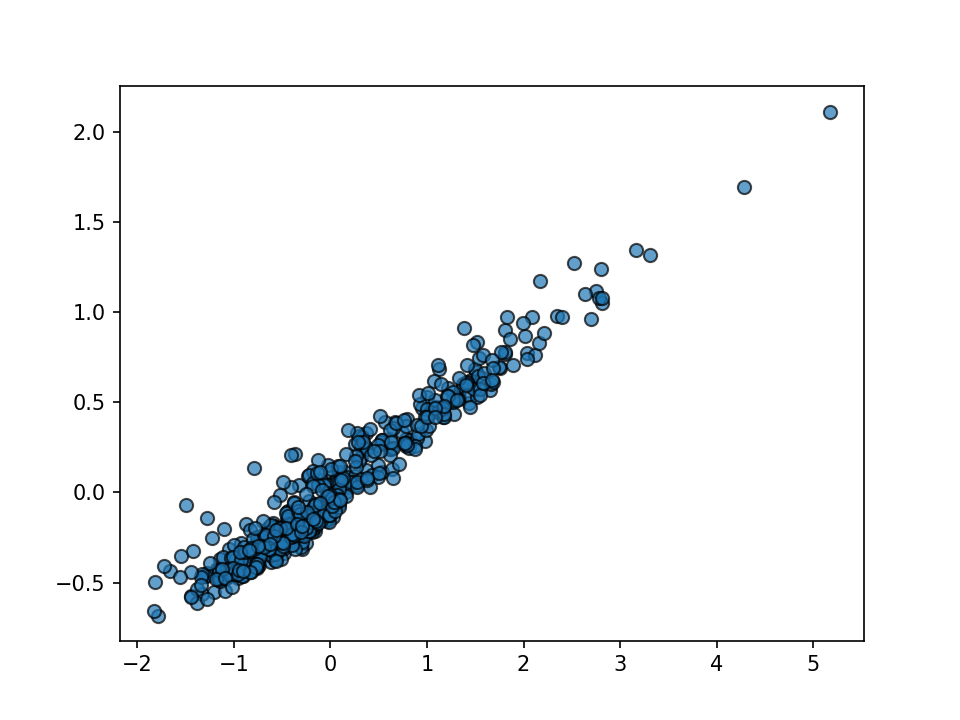

In [63]:
pca = PCA(n_components=2)
Z= pca.fit_transform(X)

# eigen_vecors= pca.components_ 
# X_approximate = Z @ eigen_vecors
X_approximate = pca.inverse_transform(Z)

plt.figure()
plt.scatter(X_approximate[:,0], X_approximate[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)

Determine number  𝑘  of pronciple components

In [68]:
def comress_score(X, X_approximate):
    return np.sum(np.apply_along_axis (np.linalg.norm,1, (X-X_approximate))**2)/\
        np.sum(np.apply_along_axis (np.linalg.norm,1, X)**2)
comress_score(X, X_approximate)

0.36631860905901376